# Árvore de decisão


Ilustra o funcionamento do algoritmo de árvore de decisão com dados contínuos.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

### Base de dados: Sonar, Mines vs. Rocks

https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29

208 instâncias

60 atributos

2 classes (rocha, mina)



In [ ]:
!pip install pydotplus
!pip install dtreeviz

     |████████████████████████████████| 61 kB 463 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.1-py3-none-any.whl size=67694 sha256=a16c449cd09432cae7ceebeab3950d41d1e172da5767802dbf9343b6580f184a
  Stored in directory: /root/.cache/pip/wheels/f4/e0/4c/26144f03fd05b7c3d82e5cf2679c2d6bd9d9b730548264674d
Successfully built dtreeviz


In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

#from google.colab import files
#uploaded = files.upload()


### Carga dos dados e particionamento das bases de treinamento e teste

### Transformação de dados

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


### Particionamento da base

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

No código a seguir, são utilizados 10% para teste e 90% para treinamento.







In [3]:
#sonar = pd.read_excel('sonar.xlsx', sheet_name=0) 
from google.colab import drive
drive.mount('/content/drive')
sonar = pd.read_excel('/content/drive/My Drive/PUC/ML/Datasets/sonar.xlsx', sheet_name=0)

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

print("\nDimensões: {0}".format(sonar.shape))
print("\nCampos: {0}".format(sonar.keys()))
print(sonar.describe(), sep='\n')

X = sonar.iloc[:,0:(sonar.shape[1] - 1)]

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:,(sonar.shape[1] - 1)])

# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dimensões: (208, 61)

Campos: Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atribut

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.1)

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [ ]:
sonar_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
sonar_tree = sonar_tree.fit(X_train, y_train)
print("Acurácia (base de treinamento):", sonar_tree.score(X_train, y_train))

y_pred = sonar_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))
      
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)



Acurácia (base de treinamento): 1.0
Acurácia de previsão: 0.8571428571428571
              precision    recall  f1-score   support

        Mina       0.88      0.78      0.82         9
       Rocha       0.85      0.92      0.88        12

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.85        21
weighted avg       0.86      0.86      0.86        21

       Mina (prev)  Rocha (prev)
Mina             7             2
Rocha            1            11


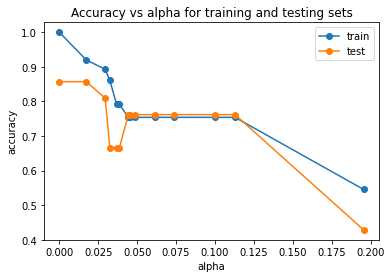

In [ ]:
# Poda na árvore baseado no ccp_alpha: Cost Complexity Prunning
# https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py


import matplotlib.pyplot as plt
path = sonar_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion='entropy')
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()



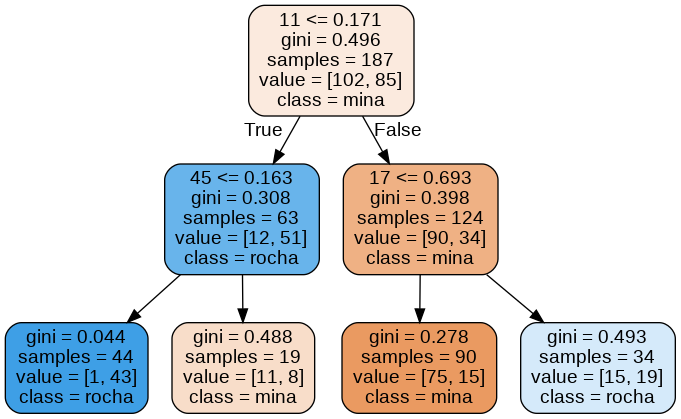

In [ ]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(clfs[5], out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(1,61),  
                                class_names=["mina", "rocha"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [ ]:
print(sonar_tree.feature_importances_)

### Exibição da árvore de decisão

In [ ]:
from dtreeviz.trees import *

viz = dtreeviz(sonar_tree,
              X_train,
              y_train,
              target_name="Classe",
              feature_names=np.arange(0,60),
              class_names=["mina", "rocha"])  

viz.view()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


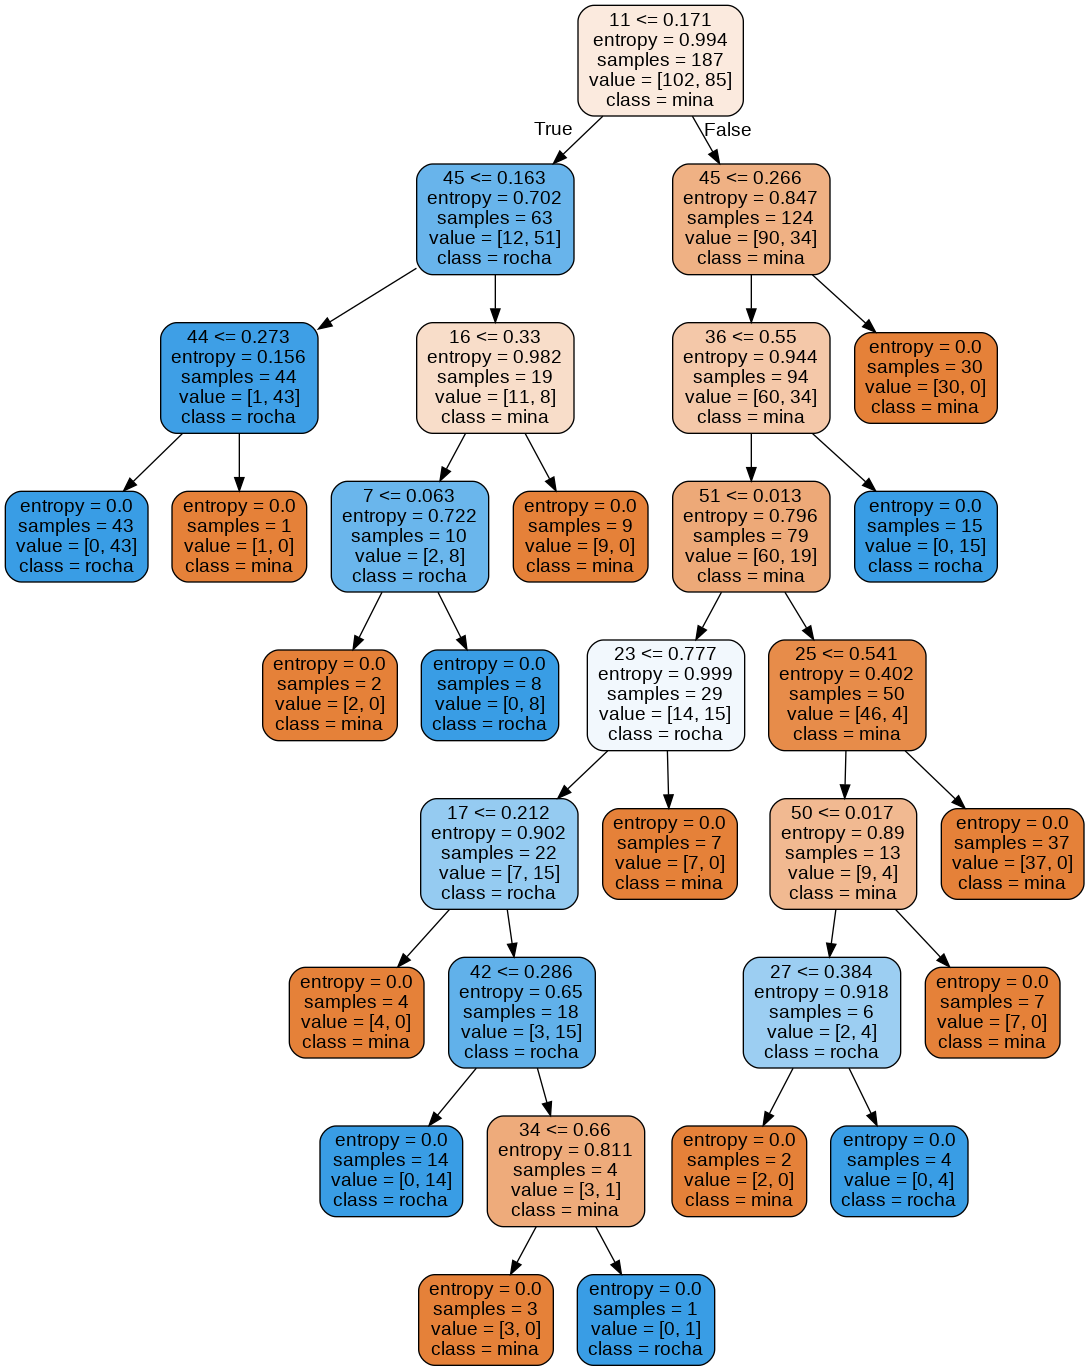

In [ ]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(sonar_tree, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(1,61),  
                                class_names=["mina", "rocha"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

ac = gnb.score(X_test, y_test)

print("\nAcurácia do treinamento: {0:.2f}%\n".format(100*gnb.score(X_train, y_train)))
print("\nAcurácia do modelo: {0:.2f}%\n".format(100*ac))

print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))
      
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)



Acurácia do treinamento: 71.66%


Acurácia do modelo: 71.43%

              precision    recall  f1-score   support

        Mina       0.80      0.44      0.57         9
       Rocha       0.69      0.92      0.79        12

    accuracy                           0.71        21
   macro avg       0.74      0.68      0.68        21
weighted avg       0.74      0.71      0.69        21

       Mina (prev)  Rocha (prev)
Mina             4             5
Rocha            1            11
